## 1) Problem statement 

1. This dataset comprises of Algerian Forest Fire Dataset taken from UCI.
2. This Model Predicts that whether there will be a fire or not in the Algerian Forest using Logistic Regression Algorithm.

# 2)  Import Data and Required Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from warnings import filterwarnings
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
filterwarnings('ignore')
%matplotlib inline

In [94]:
df= pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)

In [9]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [10]:
df.shape

(246, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


All the features are string

In [12]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

1.Day has no null value and Classes has 2 null values whereas all other features have 1 null value.

In [13]:
df.describe().T

,count,unique,top,freq
day,246,33,01,8
month,245,5,07,62
year,245,2,2012,244
Temperature,245,20,35,29
RH,245,63,64,10
Ws,245,19,14,43
Rain,245,40,0,133
FFMC,245,174,88.9,8
DMC,245,167,7.9,5
DC,245,199,8,5


# 2) Data Cleaning

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

Removing unnecessary space in column headers 

In [16]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

Dropping rows with null values

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [31]:
df.iloc[120:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


Dropping row 123 specifying header

In [32]:
df.drop([123],inplace=True)

In [35]:
df.iloc[120:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


Creating a new column called Region reprenting [0:- Bejaia and 1- Sidi Bel-abbes]

In [36]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [37]:
df.iloc[120:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0


In [20]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

Converting the necessary column dataye to int

In [38]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]].astype(int)

Converting the necessary column dataye to float

In [39]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

In [40]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

In [41]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

df[Classes] have unnecessary space, those are removed.

In [43]:
df.Classes=df.Classes.str.strip()
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

The data is for the same year hence dropping the year column.

In [44]:
df1=df.drop(['year'],axis=1)

In [47]:
df1.head()


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [48]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0


# 3) Exploratory Data Analysis

Encoding the classes as 0:not fire and 1: fire

In [57]:
df1['Classes']=np.where(df1['Classes'] == 'not fire',0,1)

In [58]:
df1[:40]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,7,6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,8,6,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
8,9,6,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,0
9,10,6,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0


In [59]:
df1.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197


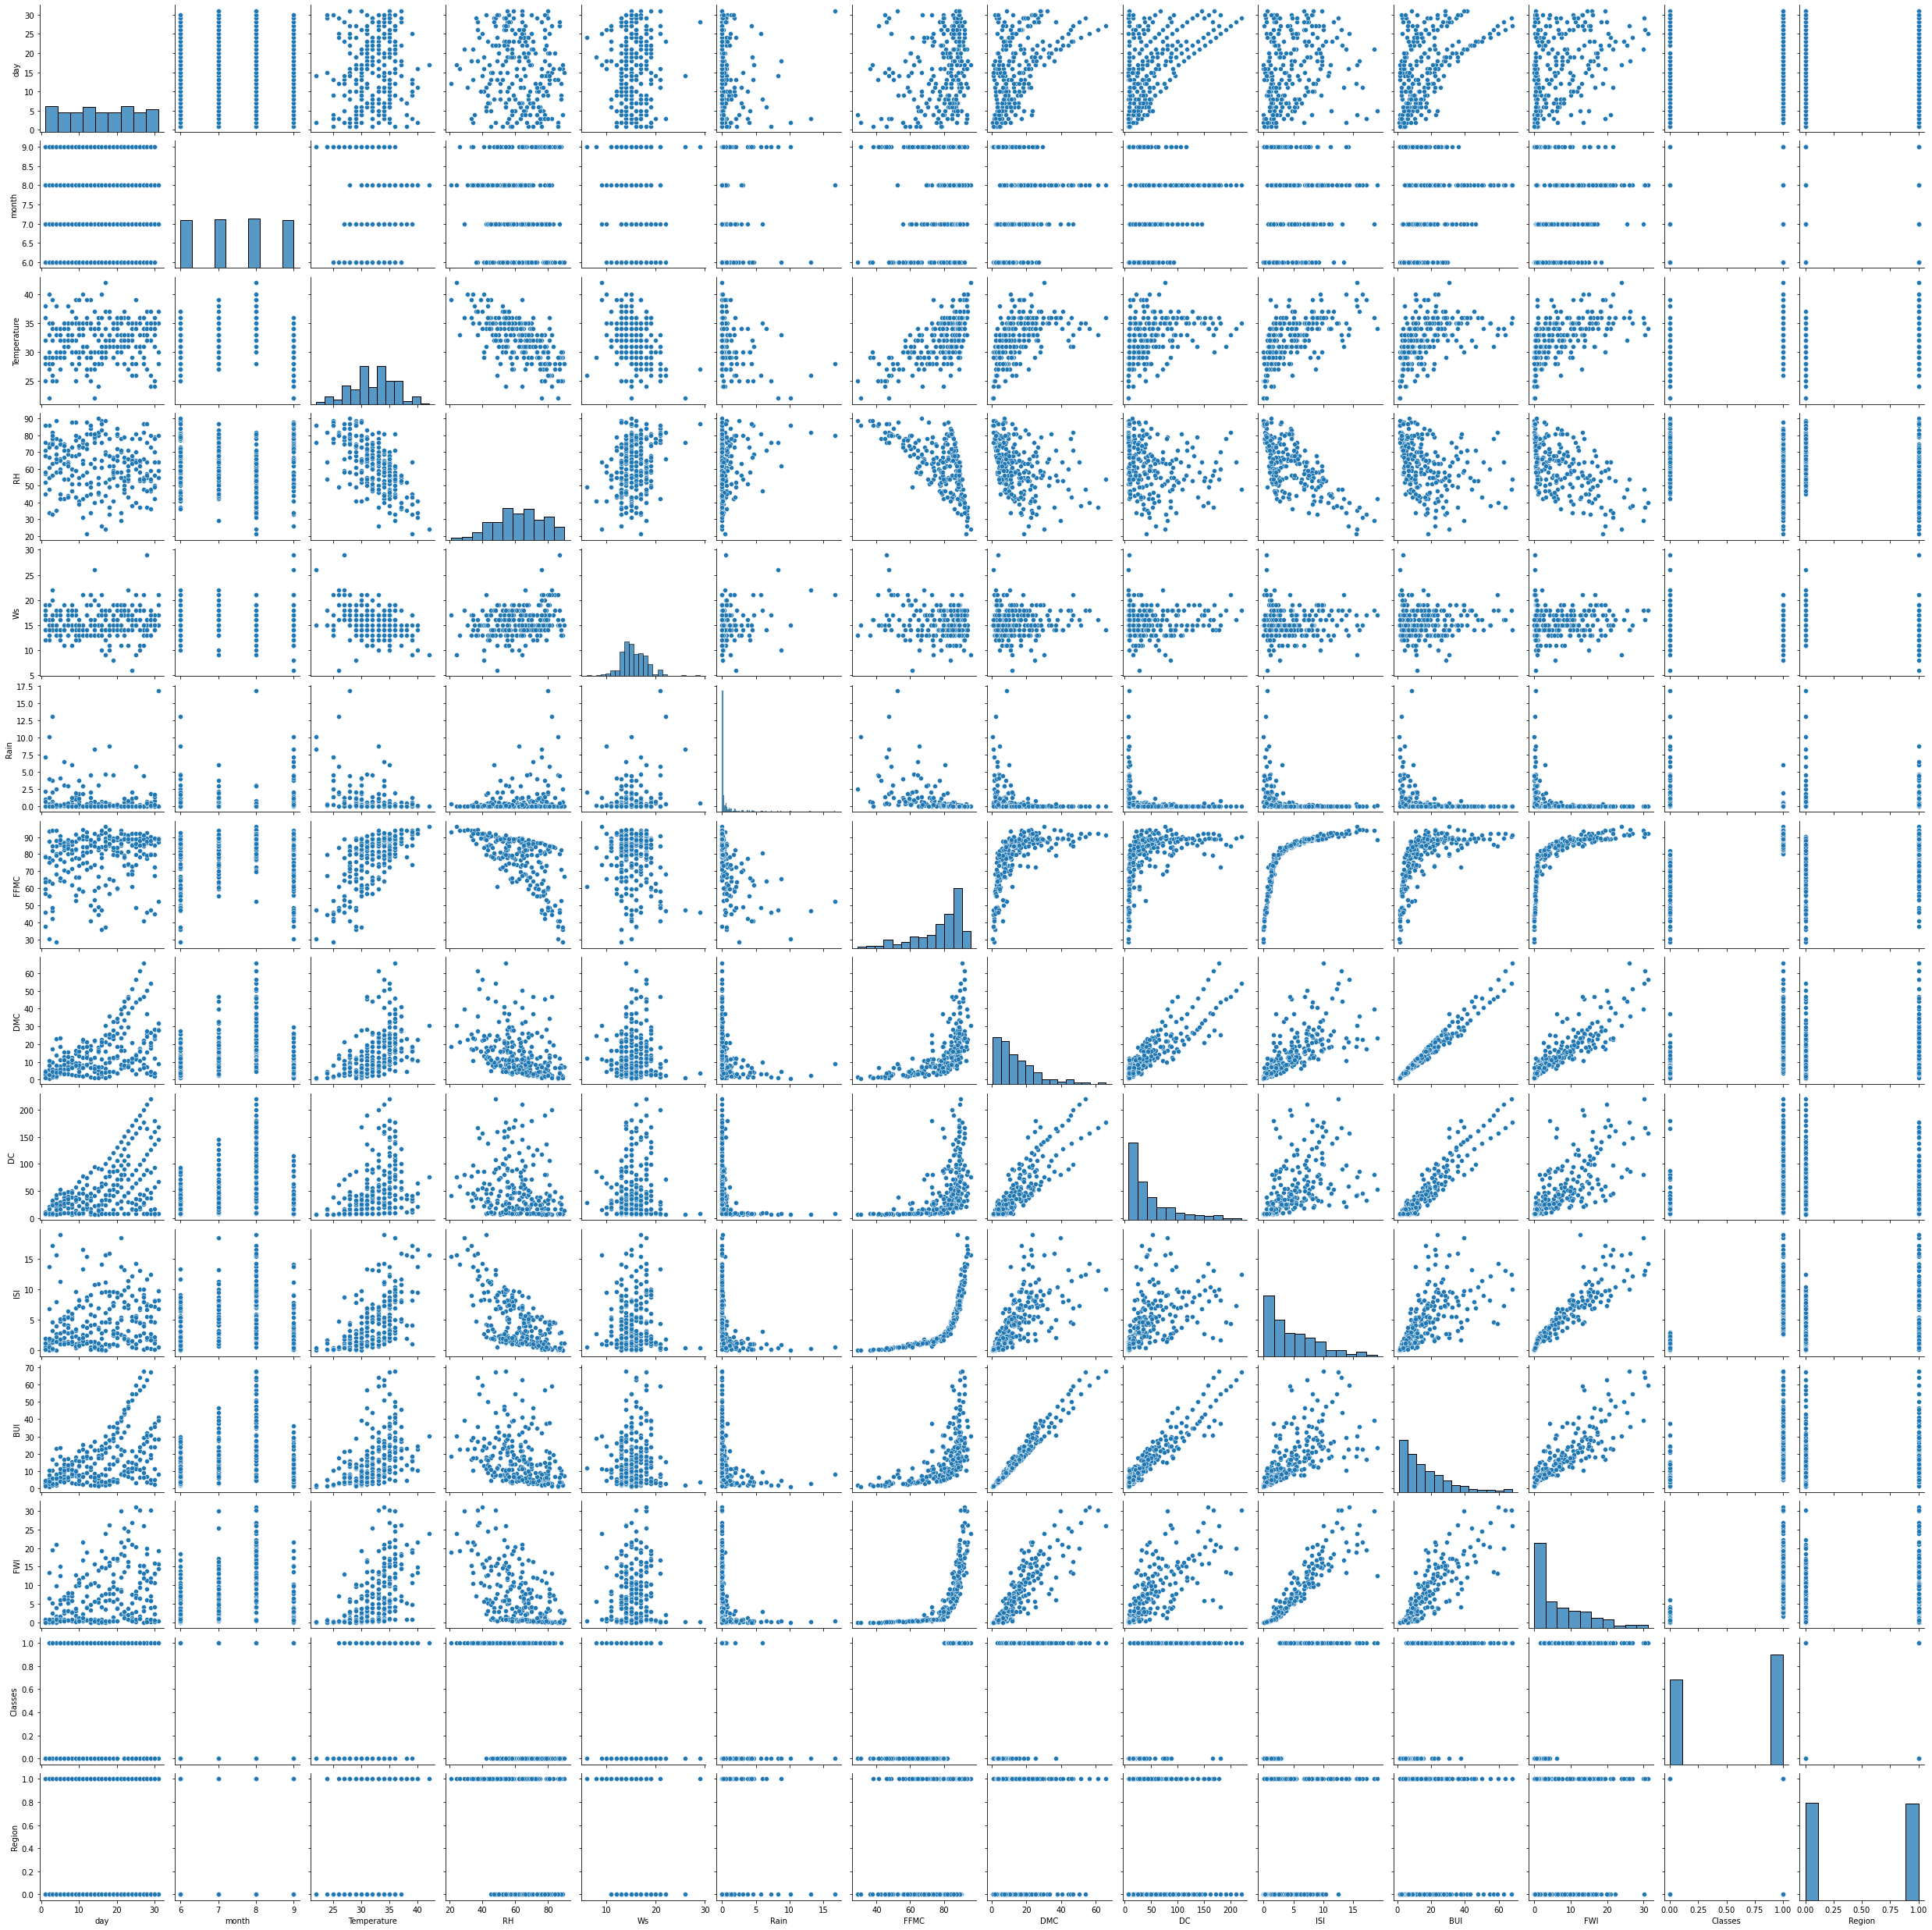

In [60]:
sns.pairplot(df1)

<AxesSubplot:>

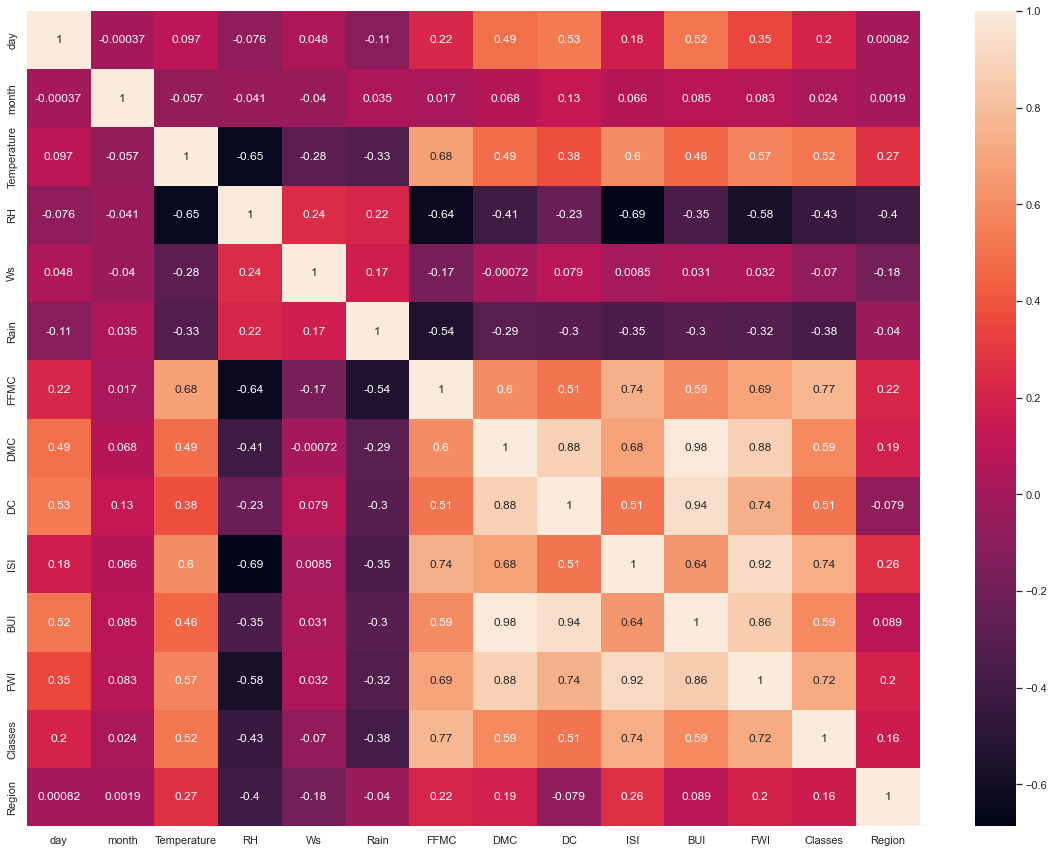

In [64]:
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(df1.corr(),annot=True)

**Inferences**
1. Rain, Wind speed(Ws) and relative humidity (RH) are negatively co-related with temperature. Which implies with increase in
these three factors the temp. decreases.
2. Among other parameters, FFMC is stringly co-related with temp.
3. Dc is least corelated with temp.

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>,
        <AxesSubplot:title={'center':'FWI'}>],
       [<AxesSubplot:title={'center':'Classes'}>,
        <AxesSubplot:title={'center':'Region'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

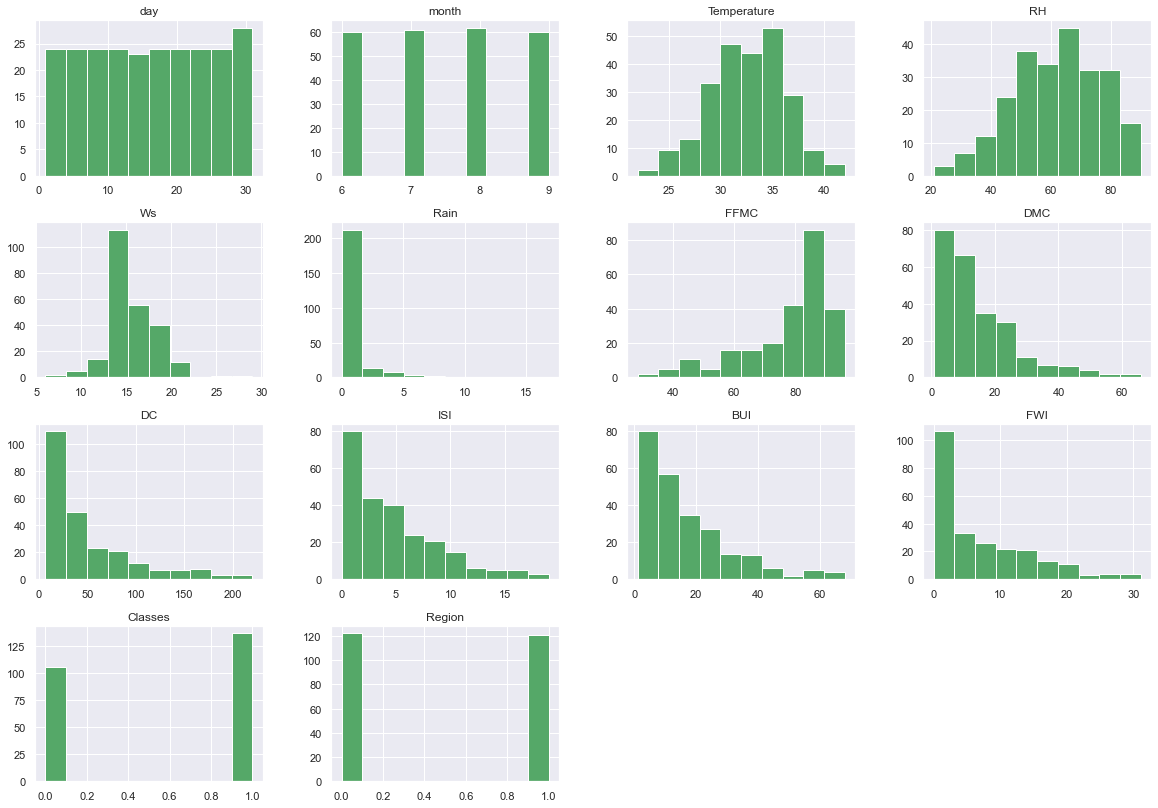

In [66]:
df1.hist(figsize=(20,14),color='g')

Showing percentage of Fire and not Fire using pie chart

In [67]:
percentage=df.Classes.value_counts(normalize=True)*100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

**Since the percentage of classes values are not equal, we can say the data is imbalnced**

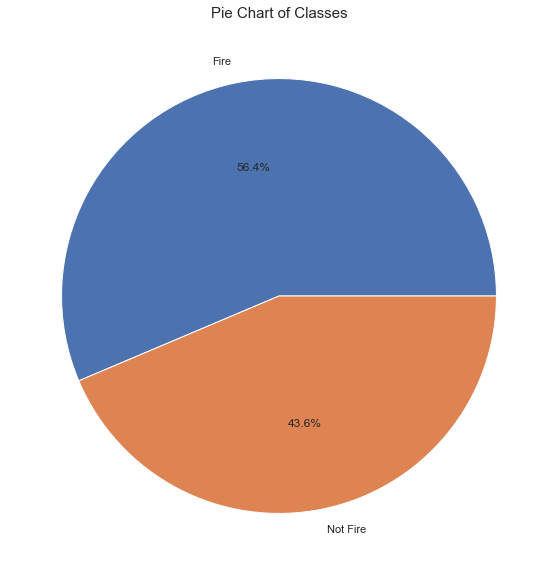

In [68]:
classes_labels=['Fire','Not Fire']
plt.figure(figsize=(15,10))
plt.pie(percentage,labels=classes_labels,autopct="%1.1f%%")
plt.title("Pie Chart of Classes",fontsize=15)
plt.show()

# 4) Handling Outliers

In [71]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

ValueError: num must be 1 <= num <= 12, not 13

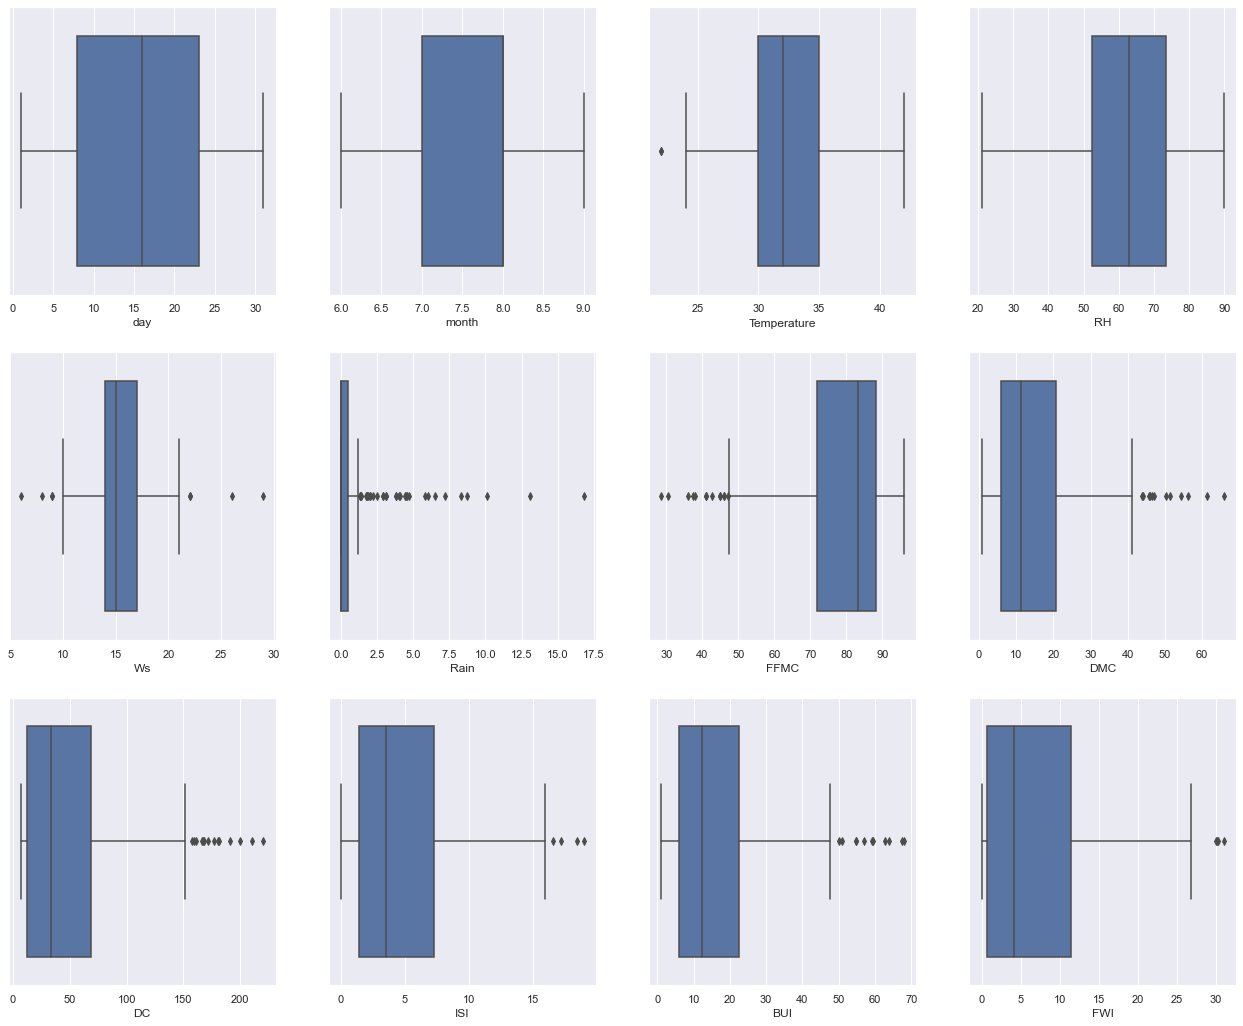

In [70]:
plt.figure(figsize=(22,18))
for i,col in enumerate(df1.columns):
    plt.subplot(3,4,i+1)
    sns.boxplot(df1[col])

Many columns have outliers and rain has the max outlier

In [72]:
df2=df1.copy()

**Remove outliers using  Interquartile Range Method( IQR ) method**

In [73]:
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df2[col] = np.where(df2[col]>upper_limit, upper_limit, np.where(df2[col]<lower_limit,lower_limit,df2[col]))
    

In [75]:
 remove_outliers_IQR('Ws')

percentile25 14.0
percentile75 17.0
Upper limit 21.5
Lower limit 9.5


In [76]:
 remove_outliers_IQR('Rain')

percentile25 0.0
percentile75 0.5
Upper limit 1.25
Lower limit -0.75


In [77]:
remove_outliers_IQR('FFMC')

percentile25 71.85
percentile75 88.3
Upper limit 112.975
Lower limit 47.17499999999999


In [78]:
remove_outliers_IQR('DMC')

percentile25 5.8
percentile75 20.799999999999997
Upper limit 43.29999999999999
Lower limit -16.699999999999992


In [79]:
remove_outliers_IQR('DC')

percentile25 12.35
percentile75 69.1
Upper limit 154.22499999999997
Lower limit -72.77499999999999


In [80]:
remove_outliers_IQR('ISI')

percentile25 1.4
percentile75 7.25
Upper limit 16.025
Lower limit -7.374999999999998


In [81]:
remove_outliers_IQR('BUI')

percentile25 6.0
percentile75 22.65
Upper limit 47.625
Lower limit -18.974999999999998


In [82]:
remove_outliers_IQR('FWI')

percentile25 0.7
percentile75 11.45
Upper limit 27.575
Lower limit -15.425


In [83]:
remove_outliers_IQR('Temperature')

percentile25 30.0
percentile75 35.0
Upper limit 42.5
Lower limit 22.5


ValueError: num must be 1 <= num <= 12, not 13

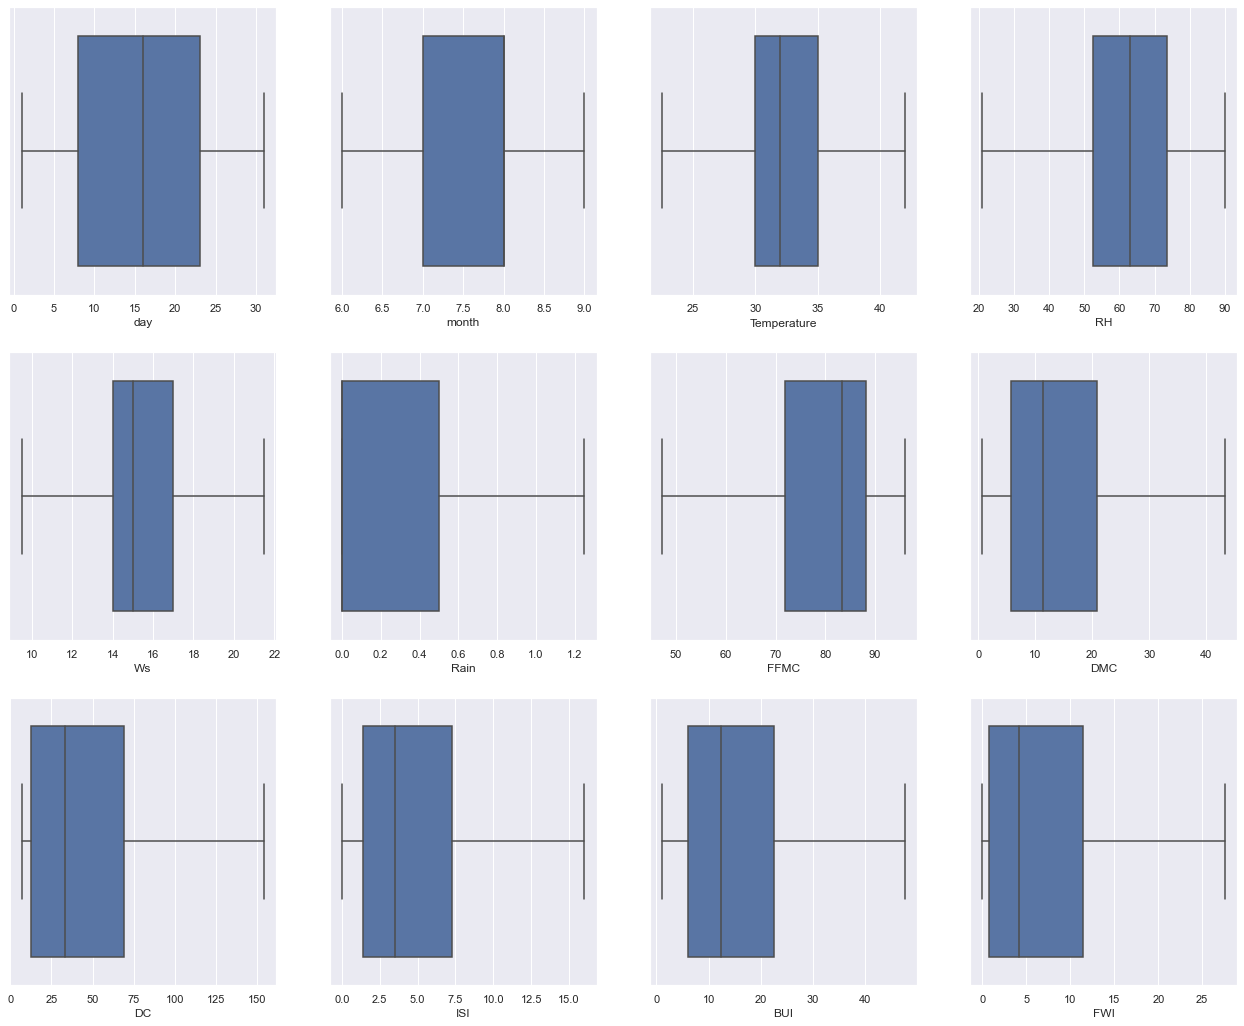

In [85]:
plt.figure(figsize=(22,18))
for i,col in enumerate(df2.columns):
    plt.subplot(3,4,i+1)
    sns.boxplot(df2[col])

 Compare Skewness

In [86]:
df1.skew()

day            0.000365
month         -0.005207
Temperature   -0.191327
RH            -0.242790
Ws             0.555586
Rain           4.568630
FFMC          -1.320130
DMC            1.522983
DC             1.473460
ISI            1.140243
BUI            1.452745
FWI            1.147593
Classes       -0.258846
Region         0.008282
dtype: float64

In [87]:
df2.skew()

day            0.000365
month         -0.005207
Temperature   -0.170656
RH            -0.242790
Ws             0.186602
Rain           1.241294
FFMC          -1.082654
DMC            1.091065
DC             1.184410
ISI            1.031482
BUI            1.024216
FWI            1.058205
Classes       -0.258846
Region         0.008282
dtype: float64

The skewness of data has been decresed after handling the outlier

 # 4) Model Building Using Logistic Regression

**It is the dataframe with outlier removed-df2**

In [88]:
df2

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29.0,57,18.0,0.00,65.700,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29.0,61,13.0,1.25,64.400,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26.0,82,21.5,1.25,47.175,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25.0,89,13.0,1.25,47.175,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27.0,77,16.0,0.00,64.800,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,30.0,65,14.0,0.00,85.400,16.0,44.5,4.5,16.9,6.5,1,1
242,27,9,28.0,87,15.0,1.25,47.175,6.5,8.0,0.1,6.2,0.0,0,1
243,28,9,27.0,87,21.5,0.50,47.175,3.5,7.9,0.4,3.4,0.2,0,1
244,29,9,24.0,54,18.0,0.10,79.700,4.3,15.2,1.7,5.1,0.7,0,1


**Creating dependent and Independent features**

In [91]:
x= df2.drop('Classes', axis=1)

In [92]:
x.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,29.0,57,18.0,0.00,65.700,3.4,7.6,1.3,3.4,0.5,0
1,2,6,29.0,61,13.0,1.25,64.400,4.1,7.6,1.0,3.9,0.4,0
2,3,6,26.0,82,21.5,1.25,47.175,2.5,7.1,0.3,2.7,0.1,0
3,4,6,25.0,89,13.0,1.25,47.175,1.3,6.9,0.0,1.7,0.0,0
4,5,6,27.0,77,16.0,0.00,64.800,3.0,14.2,1.2,3.9,0.5,0


In [93]:
y=df2['Classes']

In [95]:
y

0      0
1      0
2      0
3      0
4      0
      ..
241    1
242    0
243    0
244    0
245    0
Name: Classes, Length: 243, dtype: int32

Splitting the data into train and test data

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32,test_size=.33)

In [97]:
x_train

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
142,19,6,32.0,67,14.0,1.25,64.6,4.4,8.2,1.0,4.2,0.4,1
79,19,8,35.0,62,19.0,0.00,89.4,23.2,120.9,9.7,31.3,17.2,0
125,2,6,30.0,73,13.0,1.25,55.7,2.7,7.8,0.6,2.9,0.2,1
115,24,9,29.0,65,19.0,0.60,68.3,5.5,15.2,1.5,5.8,0.7,0
60,31,7,35.0,64,17.0,0.00,87.2,31.9,145.7,6.8,41.2,15.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,3,6,29.0,80,14.0,1.25,48.7,2.2,7.6,0.3,2.6,0.1,1
54,25,7,31.0,65,18.0,0.00,84.3,12.5,88.7,4.8,18.5,7.3,0
135,12,6,27.0,58,17.0,0.00,88.9,21.3,37.8,8.7,21.2,12.9,1
43,14,7,34.0,61,13.0,0.60,73.9,7.8,22.9,1.4,8.4,0.8,0


In [98]:
x_test

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
33,4,7,33.0,78,17.0,0.00,80.100,4.6,18.5,2.700,5.7,1.700,0
113,22,9,31.0,50,19.0,0.60,77.800,10.6,41.4,2.400,12.9,2.800,0
174,21,7,36.0,29,18.0,0.00,93.900,39.6,80.6,16.025,39.5,27.575,1
92,1,9,25.0,76,17.0,1.25,47.175,1.3,7.5,0.200,1.8,0.100,0
20,21,6,30.0,78,14.0,0.00,81.000,6.3,31.6,2.600,8.4,2.200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,7,9,31.0,62,15.0,0.00,83.300,5.8,17.7,3.800,6.4,3.200,1
116,25,9,26.0,81,21.0,1.25,48.600,3.0,7.7,0.400,3.0,0.100,0
183,30,7,36.0,56,16.0,0.00,88.900,23.8,57.1,8.200,23.8,13.200,1
73,13,8,35.0,63,15.0,0.00,87.000,19.0,85.1,5.900,24.4,10.200,0


In [99]:
y_train

142    0
79     1
125    0
115    0
60     1
      ..
126    0
54     1
135    1
43     0
218    1
Name: Classes, Length: 162, dtype: int32

In [100]:
y_test

33     0
113    0
174    1
92     0
20     1
      ..
222    1
116    0
183    1
73     1
91     0
Name: Classes, Length: 81, dtype: int32

Feature Scaling

In [101]:
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [102]:
x_train_scaled

array([[ 0.44600584, -1.3498851 , -0.06740783, ..., -0.98113354,
        -0.96242193,  0.97560608],
       [ 0.44600584,  0.49552744,  0.75159727, ...,  1.24639527,
         1.41797341, -1.02500386],
       [-1.45538746, -1.3498851 , -0.61341123, ..., -1.08798917,
        -0.99075997,  0.97560608],
       ...,
       [-0.33692082, -1.3498851 , -1.43241633, ...,  0.41620926,
         0.80870555,  0.97560608],
       [-0.11322749, -0.42717883,  0.47859557, ..., -0.63590767,
        -0.90574585, -1.02500386],
       [-1.3435408 ,  1.41823371, -1.15941463, ..., -0.8331796 ,
        -0.66487251,  0.97560608]])

In [103]:
x_test_scaled

array([[-1.23169413, -0.42717883,  0.20559387, ..., -0.85783859,
        -0.77822467, -1.02500386],
       [ 0.78154583,  1.41823371, -0.34040953, ..., -0.26602281,
        -0.62236545, -1.02500386],
       [ 0.66969916, -0.42717883,  1.02459897, ...,  1.92040768,
         2.88800922,  0.97560608],
       ...,
       [ 1.67631914, -0.42717883,  1.02459897, ...,  0.62992051,
         0.85121261,  0.97560608],
       [-0.22507415,  0.49552744,  0.75159727, ...,  0.67923849,
         0.42614202, -1.02500386],
       [ 1.78816581,  0.49552744, -1.15941463, ..., -0.64412734,
        -0.97659095, -1.02500386]])

**Model Training**

In [104]:
logistic_regression=LogisticRegression()

In [105]:
logistic_regression.fit(x_train_scaled, y_train)

LogisticRegression()

In [106]:
print('Intercept is :',logistic_regression.intercept_)
print('Coefficient is :',logistic_regression.coef_)

Intercept is : [1.66147853]
Coefficient is : [[-0.3440782  -0.0926371   0.13667396 -0.02060802 -0.00238039  0.04588821
   2.34135333 -0.1955175   0.01433895  2.20928235  0.37125675  1.76041719
   0.16159476]]


In [108]:
print("Training Score:",logistic_regression.score(x_train_scaled, y_train))
print("Test Score:",logistic_regression.score(x_test_scaled,y_test))

Training Score: 0.9814814814814815
Test Score: 0.9506172839506173


**Here since the train and test accuracy are both good. so our model in not over/under fitted.**

In [122]:
y_Log_Pred=logistic_regression.predict(x_test_scaled)

In [123]:
y_Log_Pred

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0])

In [124]:
accuracy_score(y_test,y_Log_Pred)

0.9506172839506173

**Accuracy is 95%**

In [112]:
 # r2 score
logistic_regression.score(x_train,y_train)

0.5802469135802469

In [114]:
def adj_r2(x,y,r2):
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [115]:
# adj_r2 score

adj_r2(x_train,y_train,logistic_regression.score(x_train,y_train))

0.5433767100433767

In [125]:
conf_mat = confusion_matrix(y_test,y_Log_Pred)
conf_mat

array([[37,  1],
       [ 3, 40]], dtype=int64)

In [126]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [127]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9506172839506173

In [128]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9736842105263158

In [129]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.925

In [130]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9487179487179489

**Dataframe with outliers- df1**

In [131]:
df1 

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
242,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
243,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
244,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


Creating dependent and Independent features

In [132]:
x= df1.drop('Classes', axis=1)

In [133]:
x

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
242,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
243,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
244,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [136]:
y= df1['Classes']

In [137]:
y

0      0
1      0
2      0
3      0
4      0
      ..
241    1
242    0
243    0
244    0
245    0
Name: Classes, Length: 243, dtype: int32

Splitting the data into train and test data

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32,test_size=.33)

Feature Scaling

In [139]:
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

**Model Training**

In [140]:
logistic_regression.fit(x_train_scaled, y_train)

LogisticRegression()

In [141]:
print('Intercept is :',logistic_regression.intercept_)
print('Coefficient is :',logistic_regression.coef_)

Intercept is : [1.71306525]
Coefficient is : [[-0.34192132 -0.07836204  0.12469918  0.01467443 -0.04414666  0.22216228
   2.32254905 -0.14476377 -0.02960646  2.29195013  0.39572314  1.82517317
   0.13035426]]


In [142]:
print("Training Score:",logistic_regression.score(x_train_scaled, y_train))
print("Test Score:",logistic_regression.score(x_test_scaled,y_test))

Training Score: 0.9814814814814815
Test Score: 0.9506172839506173


**Here since the train and test accuracy are both good. so our model in not over/under fitted.**

In [143]:
y_LogPred=logistic_regression.predict(x_test_scaled)

In [144]:
y_LogPred

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0])

In [145]:
accuracy_score(y_test,y_LogPred)

0.9506172839506173

In [146]:
# r2 score
logistic_regression.score(x_train,y_train)

0.5802469135802469

In [147]:
# adj_r2 score

adj_r2(x_train,y_train,logistic_regression.score(x_train,y_train))

0.5433767100433767

In [148]:
conf_mat = confusion_matrix(y_test,y_Log_Pred)
conf_mat

array([[37,  1],
       [ 3, 40]], dtype=int64)

In [149]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [150]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9506172839506173

In [151]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9736842105263158

In [152]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.925

In [153]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9487179487179489

**We see that the outlier has no effect on the dataset.**

In [154]:
df1['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

**The difference between two classes is 137-106= 31. So we can say data is imbalance.**

# Over/Up-Sample Minority Class
**Here we use oversampling to convert the imbalnce data to balance data.
In oversampling, resampling of the minority class points (0) are made equal to the total number of majority points(1)**

In [168]:
# Assigning the majority and minority classes
df_major = df1[df1.Classes == 1]
df_minor = df1[df1.Classes == 0]


In [171]:
from sklearn.utils import resample
# Upsampling minority class
df_minor_sample = resample(df_minor,                         
                           # Upsample with replacement
                           replace=True, 
                           # Number to match majority class
                           n_samples=137,   
                           random_state=42)
# Combine majority and upsampled minority class
df_sample = pd.concat([df_major, df_minor_sample])
  
# Display count of data points in both class
print(df_sample.Classes.value_counts())

1    137
0    137
Name: Classes, dtype: int64


In [172]:
df_sample

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,7,6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,8,6,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
10,11,6,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,1,0
11,12,6,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,14,7,34,61,13,0.6,73.9,7.8,22.9,1.4,8.4,0.8,0,0
9,10,6,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0
138,15,6,28,90,15,0.0,66.8,7.2,14.7,1.2,7.1,0.6,0,1
137,14,6,27,79,16,0.7,53.4,6.4,7.3,0.5,6.1,0.3,0,1


In [175]:
df_sample.shape # It is the balanced data dataframe

(274, 14)

In [176]:
df1.shape

(243, 14)

In [177]:
x_bal= df_sample.drop('Classes', axis=1)

In [180]:
y_bal=df_sample['Classes']

In [181]:
x_train,x_test,y_train,y_test=train_test_split(x_bal,y_bal,random_state=32,test_size=.33)

In [182]:
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [183]:
logistic_regression.fit(x_train_scaled, y_train)

LogisticRegression()

In [184]:
print('Intercept is :',logistic_regression.intercept_)
print('Coefficient is :',logistic_regression.coef_)

Intercept is : [0.85224693]
Coefficient is : [[-0.39039949 -0.04015652 -0.23494775 -0.20266519  0.01971053  0.07130915
   2.18800162 -0.27177223  0.32967726  2.38295416  0.53563839  1.91950354
   0.2811593 ]]


In [185]:
print("Training Score:",logistic_regression.score(x_train_scaled, y_train))
print("Test Score:",logistic_regression.score(x_test_scaled,y_test))

Training Score: 0.9617486338797814
Test Score: 0.978021978021978


In [186]:
y_Log_Pred_bal=logistic_regression.predict(x_test_scaled)

In [189]:
conf_mat = confusion_matrix(y_test,y_Log_Pred_bal)
conf_mat

array([[44,  1],
       [ 1, 45]], dtype=int64)

In [190]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [191]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9777777777777777

In [192]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9777777777777777

In [193]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9777777777777777

**In case of balanced dataset we observe that the model precision and recall is 97% which implies the model predicts correctly the positive results.** 